In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Read in regression data

In [4]:
df_all = pd.read_csv('fanfic_regression_data.tsv', sep = '\t')

In [5]:
df_all.head(2)

,ArchiveWarnings,Author,Bookmarks,Category,ChapterIndex,Chapters,Comments,Hits,Kudos,Rating,Relationship,Term_novelty,Topic_novelty,tag_novelty,fandom_category,History
0,No Archive Warnings Apply,tag0,0.666667,Gen,1.0,3,0,106.666667,2.666667,General Audiences,NaN,0.778655,0.599456,-0.012112,harry_potter,5102.0
1,No Archive Warnings Apply,kaiz,0.000000,M/M,0.0,1,1,1359.000000,19.000000,Mature,Harry Potter/Severus Snape,0.879855,0.625602,NaN,harry_potter,5561.0


### Column information

ArchiveWarnings: warnings about the fictions (violence, explicit contents, etc). There are a few warning types and their combinations.

Author: the authors of each fiction.

Bookmarks: number of people who has bookmarked a fiction (average of each chapter). Positive floats.

Category: the type of relationships in the fiction (Female/Female, Female/Male, etc)

ChapterIndex: the first, second, ... chapter in the fiction.

Chapters: the total number of chapters in a fiction.

Comments: the number of comments for each chapter. Positive integers.

Hits: how many people have clicked on the fiction (average of each chapter). Positive floats.

Kudos: how many people have "liked" the fiction (average of each chapter). Positive floats.

Rating: the rating of the fiction (Genera/Mature/Explicit...).

Relationship: the parings of characters in the fiction.

Term novelty: novelty score based on words. A float number between 0-1.

Topic novelty: novelty score based on topics. A float number between 0-1.

Tag novelty: novelty score based on tags. A float number between 0-1.

Fandom_category: the name of the fandom. There are 24 in total.

History: the number of days between the fiction was published and now. Positive integers.

## Current regression analysis

### Turn some columns into categorical variables

In [4]:
df_all['ArchiveWarnings'] = df_all['ArchiveWarnings'].astype('category')
df_all['ArchiveWarnings_cat'] = df_all['ArchiveWarnings'].cat.codes
del df_all['ArchiveWarnings']

In [5]:
df_all['Author'] = df_all['Author'].astype('category')
df_all['Author_cat'] = df_all['Author'].cat.codes
del df_all['Author']

In [6]:
df_all['Category'] = df_all['Category'].astype('category')
df_all['Category_cat'] = df_all['Category'].cat.codes
del df_all['Category']

In [7]:
df_all['Rating'] = df_all['Rating'].astype('category')
df_all['Rating_cat'] = df_all['Rating'].cat.codes
del df_all['Rating']

In [8]:
df_all['Relationship'] = df_all['Relationship'].astype('category')
df_all['Relationship_cat'] = df_all['Relationship'].cat.codes
del df_all['Relationship']

In [9]:
df_all['fandom_category'] = df_all['fandom_category'].astype('category')
df_all['Fandom_cat'] = df_all['fandom_category'].cat.codes
del df_all['fandom_category']

### Correlations between the numerical variables

In [10]:
corr = df_all[['Kudos','Bookmarks', 'Comments', 'Hits','Chapters', 'Term_novelty', 'Topic_novelty', 'History']].corr()

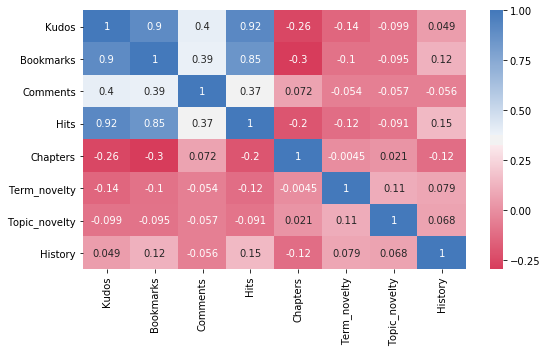

In [11]:
cmap = sns.diverging_palette(5, 250, as_cmap=True)
plt.figure(figsize = (8,5))

corr_plt = sns.heatmap(corr, cmap=cmap, annot=True)
plt.tight_layout()
plt.savefig('variables_corr.pdf', format='pdf')

### Run OLS

In [12]:
# drop rows with nan values
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.dropna(how = 'any')

#### Use 4 variables as outcome vatiables: kudos, hits, comments, bookmarks. The others are predictor variables.

In [13]:
model = ols("Kudos ~ Term_novelty + Topic_novelty +  Fandom_cat + Chapters +  ArchiveWarnings_cat\
+ Author_cat + Category_cat + Rating_cat + Relationship_cat + History", data=df_all).fit()

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     1858.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:            -2.7144e+05
No. Observations:              181733   AIC:                         5.429e+05
Df Residuals:                  181722   BIC:                         5.430e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               2.9737    

In [15]:
model = ols("Hits ~ Term_novelty + Topic_novelty +  Fandom_cat + Chapters +  ArchiveWarnings_cat\
+ Author_cat + Category_cat + Rating_cat + Relationship_cat + History", data=df_all).fit()

In [16]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     1937.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:            -2.6261e+05
No. Observations:              181733   AIC:                         5.252e+05
Df Residuals:                  181722   BIC:                         5.254e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.5440    

In [17]:
model = ols("Comments ~ Term_novelty + Topic_novelty +  Fandom_cat + Chapters +  ArchiveWarnings_cat\
+ Author_cat + Category_cat + Rating_cat + Relationship_cat + History", data=df_all).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     519.1
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:            -2.4561e+05
No. Observations:              181733   AIC:                         4.912e+05
Df Residuals:                  181722   BIC:                         4.913e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.7733    

In [19]:
model = ols("Bookmarks ~ Term_novelty + Topic_novelty +  Fandom_cat + Chapters +  ArchiveWarnings_cat\
+ Author_cat + Category_cat + Rating_cat + Relationship_cat + History", data=df_all).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2006.
Date:                Mon, 11 Jun 2018   Prob (F-statistic):               0.00
Time:                        16:41:37   Log-Likelihood:            -2.9185e+05
No. Observations:              181733   AIC:                         5.837e+05
Df Residuals:                  181722   BIC:                         5.838e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.0106    